In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import re

Make sure json file is in correct format with a "]" at the end

In [13]:
# Get all tags in a list 
def get_tags():
    '''form professors.jason, get a list of all thags that was used'''
    with open(datapath+'/raw/professors_play.json') as f:
        json_data = f.read()
    f.close()
    
    tag_collection = re.findall('review_count".\s[0-9]+,\s(.+)}', json_data)

    tags = []
    for i in tag_collection:
        for tag_n in i.split(','):
            tag = tag_n.split(':')[0].strip().strip('\"')
            if tag not in tags:
                tags.append(tag)
    return tags

In [9]:
def extract_dept(raw):
    return re.search('.+the\s(.+)\sdepartment', raw).group(1)
def extract_schoolid(raw):
    raw = str(raw)
    stringid = re.search('.+sid=(.+)', raw).group(1)
    return int(stringid)

In [6]:
datapath = '/home/zafrin/PycharmProjects/RateMyProfessor/data'
prof = pd.read_json(datapath+'/raw/professors_play.json')

In [7]:
prof.shape

(6022, 32)

In [14]:
tags = get_tags()
tags.sort()

In [15]:
tags

['accessible outside class',
 'amazing lectures',
 'beware of pop quizzes',
 'caring',
 'clear grading criteria',
 'extra credit',
 'get ready to read',
 'gives good feedback',
 'graded by few things',
 'group projects',
 'hilarious',
 'inspirational',
 'lecture heavy',
 'lots of homework',
 'participation matters',
 'respected',
 "skip class? you won't pass.",
 'so many papers',
 'test heavy',
 'tough grader']

In [16]:
prof_core_cols = [col for col in prof.columns if col not in tags]
prof_core_cols

['city',
 'dept',
 'hotness',
 'id',
 'level_of_difficulity',
 'name',
 'overall_quality',
 'review_count',
 'school',
 'school_link',
 'state',
 'take_again']

In [17]:
rearranged_core_cols_order = ['id','review_count','dept','overall_quality','level_of_difficulity','hotness','take_again','name','school','school_link','city','state']
print('missing cols: {}'.format(len(prof_core_cols)-len(rearranged_core_cols_order)))

missing cols: 0


In [18]:
prof = prof.reindex_axis(rearranged_core_cols_order + tags, axis=1)

In [19]:
# Cleaning data within columns
prof.dept = prof.dept.apply(extract_dept)
prof.school_link = prof.school_link.apply(extract_schoolid)
prof.rename(columns={'school_link': 'schoolid'}, inplace=True)

In [20]:
prof.head(3)

,id,review_count,dept,overall_quality,level_of_difficulity,hotness,take_again,name,school,schoolid,...,hilarious,inspirational,lecture heavy,lots of homework,participation matters,respected,skip class? you won't pass.,so many papers,test heavy,tough grader
0,100001,55,Sociology,3.8,2.4,cold-chili,N/A,Dan Clawson,University of Massachusetts,1513,...,NaN,1.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN
1,100004,15,Philosophy,4.5,3.4,new-hot-chili,N/A,Cressida Heyes,University of Alberta,1407,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2,100006,37,Business,3.1,3.6,cold-chili,40%,Danny Ervin,Salisbury University,871,...,NaN,NaN,2.0,2.0,NaN,NaN,3.0,NaN,2.0,1.0


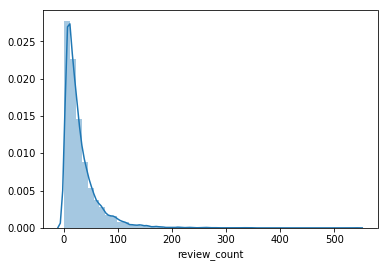

In [93]:
sns.distplot(prof.review_count)

In [63]:
# distplot with rug=true for all tags
# hitmap of review by department

'1513'

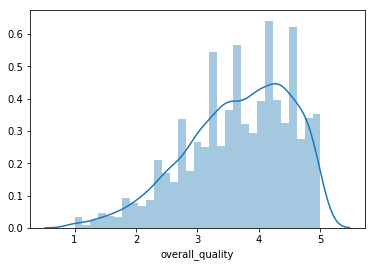

In [99]:
sns.distplot(prof.overall_quality)

In [137]:
pair = prof[['review_count','dept','overall_quality','level_of_difficulity','hotness','take_again', 'hotness']]

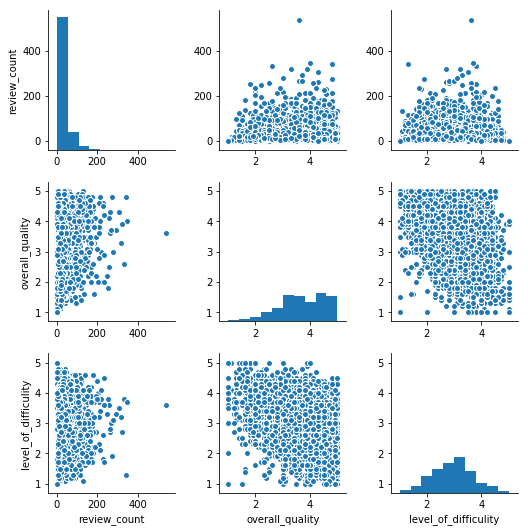

In [140]:
sns.pairplot(pair)

In [20]:
prof.take_again.apply(lambda x: np.nan for x if x=='N/A')

SyntaxError: invalid syntax (<ipython-input-20-a37d21db64fe>, line 1)

In [ ]:
overall_quality = prof[['overall_quality'] + tags]


In [ ]:
pair = prof[['le'] + tags]
sns.pairplot(pair)

In [113]:
prof.hotness.value_counts()

cold-chili       4656
new-hot-chili    1366
Name: hotness, dtype: int64

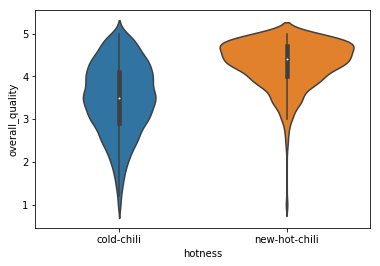

In [115]:
sns.violinplot(x='hotness', y='overall_quality', data=prof)

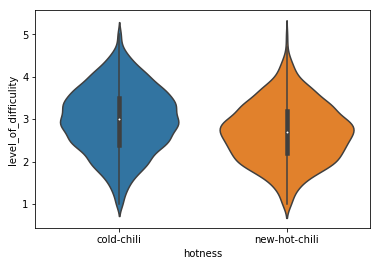

In [116]:
sns.violinplot(x='hotness', y='level_of_difficulity', data=prof)

A higher quality professor significently contributes to the professor's hotness. Lower level of difficulity positively skews the hotness distribution.

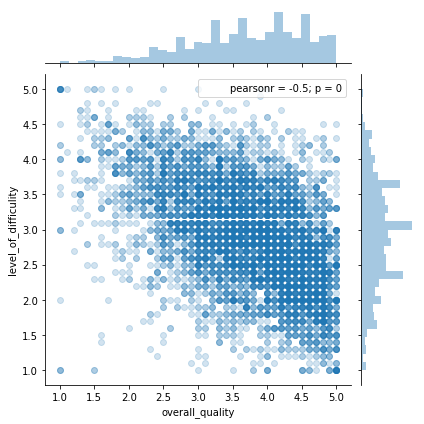

In [142]:
sns.jointplot(x='overall_quality', y='level_of_difficulity', data=prof, alpha = 0.2)

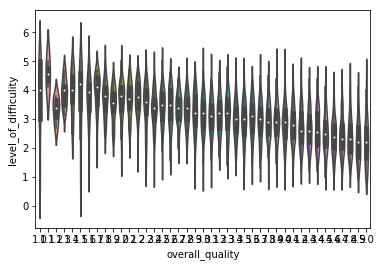

In [143]:
sns.violinplot(x='overall_quality', y='level_of_difficulity', data=prof)

Overall quality and level of difficulity has an inverse relationship.As level of dificulity decreases, there is a gradual increase in overall quality

In [162]:
tag_count_map = dict()
for tag in tags:
    tag_count_map[tag] = prof[tag].sum()
for tag, count in tag_count_map.items():
    print(count, '\t', tag)

1016.0 	 accessible outside class
2269.0 	 amazing lectures
553.0 	 beware of pop quizzes
2987.0 	 caring
2321.0 	 clear grading criteria
1206.0 	 extra credit
3247.0 	 get ready to read
3258.0 	 gives good feedback
971.0 	 graded by few things
673.0 	 group projects
2195.0 	 hilarious
2094.0 	 inspirational
2514.0 	 lecture heavy
2294.0 	 lots of homework
2615.0 	 participation matters
3336.0 	 respected
3551.0 	 skip class? you won't pass.
629.0 	 so many papers
1011.0 	 test heavy
4286.0 	 tough grader


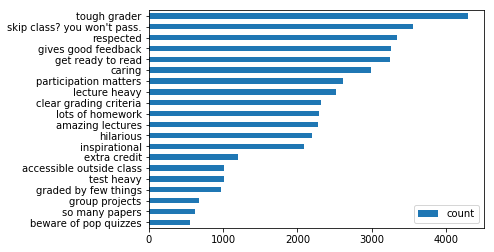

In [184]:
tag_count = pd.DataFrame(tag_count_map, index=['count']).transpose()
tag_count = tag_count.sort_values(by='count',ascending=True)
tag_count.plot(kind='barh')

In [151]:
# groupby overall quality with sum of tags
# groupby overall dificulity with sum of tags
# groupby overall hotness with sum of tags

In [ ]:
#What tags are associated with high reating

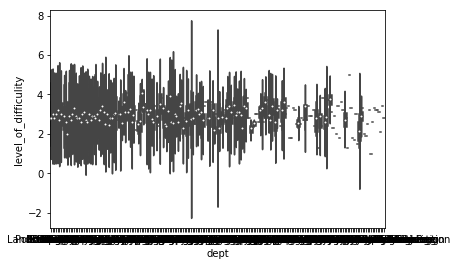

In [185]:
sns.violinplot(x='dept', y='level_of_difficulity', data=prof)

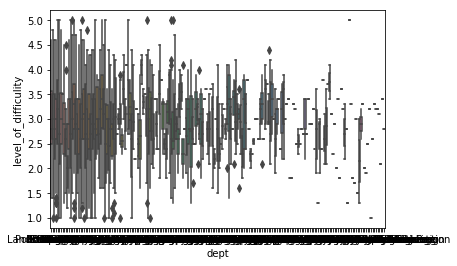

In [19]:
sns.boxplot(x='dept', y='level_of_difficulity', data=prof)

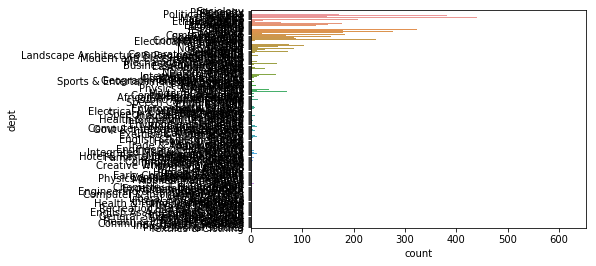

In [198]:
sns.countplot(y='dept', data=prof)

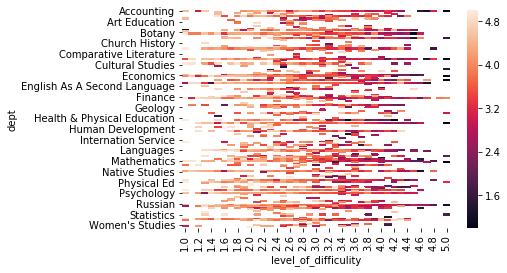

In [194]:
pt = prof.pivot_table(index='dept',columns='level_of_difficulity', values='overall_quality')
sns.heatmap(pt)

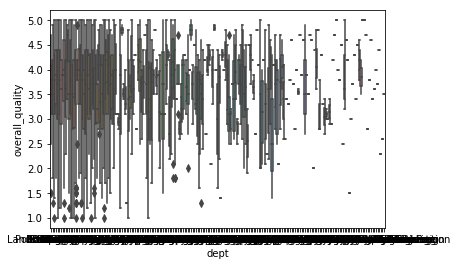

In [18]:
sns.boxplot(x='dept', y='overall_quality', data=prof)

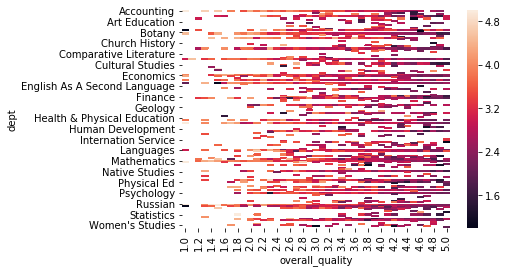

In [199]:
pt = prof.pivot_table(index='dept',columns='overall_quality', values='level_of_difficulity')
sns.heatmap(pt)

In [201]:
pt

overall_quality,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
dept,,,,,,,,,,,,,,,,,,,,,
Accounting,5.0,NaN,NaN,4.7,NaN,4.60,NaN,3.9,NaN,3.5,...,3.100000,3.000000,2.937500,2.680000,2.600000,2.800000,NaN,2.716667,2.433333,NaN
African Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.500000,NaN,NaN,NaN,NaN,NaN
African-American Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.600000,2.100000,1.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agriculture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.500000,NaN,NaN,NaN,1.500000,2.000000,NaN,NaN,2.400000,NaN
Animal Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anthropology,NaN,NaN,NaN,NaN,NaN,3.10,2.900000,NaN,NaN,NaN,...,3.000000,2.050000,2.380000,NaN,2.420000,3.300000,2.100000,1.900000,1.500000,3.000000
Applied Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.900000,NaN,NaN,NaN,NaN
Architecture,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.800000,NaN,1.000000,NaN,3.600000,NaN,NaN,3.000000
Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: The condensed distance matrix must contain only finite values.

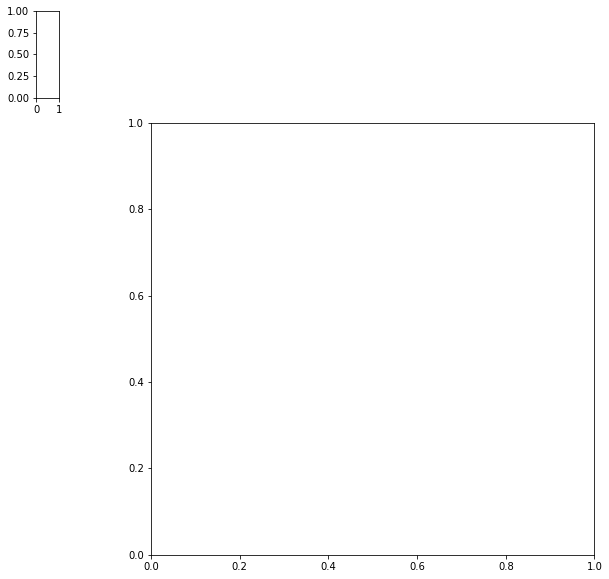

In [200]:
sns.clustermap(pt)

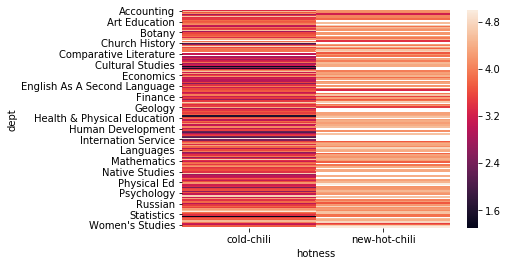

In [193]:
pt = prof.pivot_table(index='dept',columns='hotness', values='overall_quality')
sns.heatmap(pt)

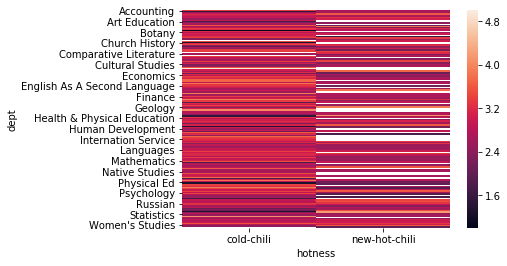

In [195]:
pt = prof.pivot_table(index='dept',columns='hotness', values='level_of_difficulity')
sns.heatmap(pt)

In [191]:
pt

level_of_difficulity,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
dept,,,,,,,,,,,,,,,,,,,,,
Accounting,4.50,NaN,3.00,4.600000,NaN,NaN,NaN,NaN,NaN,4.100000,...,3.30000,2.980,2.40,NaN,NaN,1.500,1.300,3.1,NaN,1.000
African Studies,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
African-American Studies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,NaN,...,3.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agriculture,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,3.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anthropology,NaN,NaN,NaN,NaN,NaN,4.9,3.500000,NaN,4.000000,4.650000,...,3.15000,NaN,2.20,3.900000,NaN,NaN,NaN,NaN,NaN,NaN
Applied Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Architecture,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.violinplot(x='overall_quality', y='level_of_difficulity', data=prof)

## Determine sex of the professor

In [28]:
reviews = pd.read_json(datapath+'/raw/reviews_old_play.json')

In [29]:
def determine_sex_from_review(comment):
    male, female = 0,0
    for word in comment.lower().split():
        if word in ['his', 'him', 'he']:
            male +=1
        if word in ['she', 'her']:
            female +=1
    if male > female:
            return 1
    elif female > male:
            return 0
    elif female == male:
            return np.nan

In [30]:
reviews['sex'] = reviews.comments.copy()
reviews.sex = reviews.sex.apply(determine_sex_from_review)

sexdf = reviews[['prof_id', 'sex']]

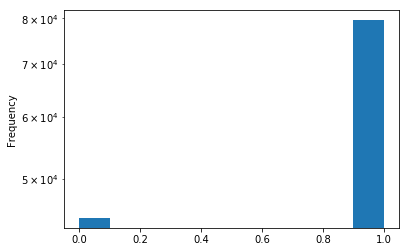

In [127]:
sexdf.sex.plot(kind='hist', log=True)

In [31]:
sexdf = sexdf.groupby(['prof_id']).mean()

In [34]:
del reviews

In [32]:
def determine_sex_prof(n):
    if n >= 0.6: return 1
    elif n <= 0.4: return 0
    else: return n
sexdf.sex = sexdf.sex.apply(determine_sex_prof)

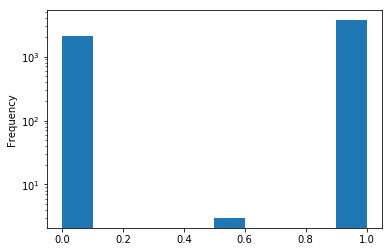

In [130]:
sexdf.sex.plot(kind='hist', log=True)

In [33]:
sexdf.sex.value_counts()

1.0    3698
0.0    2103
0.5       3
Name: sex, dtype: int64

In [35]:
prof = prof.merge(sexdf.reset_index(), left_on='id', right_on='prof_id')

In [135]:
df = prof[prof['sex']<1.0]
df = df[df['sex']>0.0]
df

,id,review_count,dept,overall_quality,level_of_difficulity,hotness,take_again,name,school,schoolid,...,so many papers,test heavy,tough grader,index,prof_id_x,sex_x,prof_id_y,sex_y,prof_id,sex
1519,102984,6,Fine Arts,3.3,3.5,cold-chili,N/A,Vladimir Spicanovic,The Ontario College of Art and Design Universi...,4062,...,NaN,NaN,NaN,1520,102984,0.5,102984,0.5,102984,0.5
3506,106590,8,Science,4.4,3.8,cold-chili,N/A,Norman Duffy,Wheeling Jesuit University,1272,...,NaN,NaN,NaN,3505,106590,1.0,106590,0.5,106590,0.5
5111,109435,5,Education,3.5,3.0,cold-chili,N/A,Andrews,Indiana State University,436,...,NaN,NaN,NaN,5108,109435,0.5,109435,0.5,109435,0.5


In [36]:
prof.sex[3506] = 1.0
prof.sex[5111] = 1.0
prof.sex[1519] = 1.0

/home/zafrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/zafrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/zafrin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [37]:
prof.sex.value_counts()

1.0    3704
0.0    2103
Name: sex, dtype: int64

In [39]:
import pickle
pickle_out = open('/home/zafrin/PycharmProjects/RateMyProfessor/data/pickle/prof.pickle', 'wb')
pickle.dump(prof, pickle_out)
pickle_out.close()

## Raviews

In [137]:
reviews.head()

,attendence,class_names,comments,date,for_credits,grades_revieved,level_of_difficulty,overall_quality,prof_id,rating_type,tags_by_user,textbook_used,thumbs_down,thumbs_up,would_take_again,sex
0,Mandatory,SOC106,Clawson is really caring and interested in his...,2017-12-14,Yes,N/A,3,4.0,100001,good,"[CARING, RESPECTED, GET READY TO READ]",No,0,0,Yes,1.0
1,Mandatory,SOC353,This class was definitely not what I thought i...,2017-11-15,N/A,B,3,3.0,100001,average,"[CLEAR GRADING CRITERIA, PARTICIPATION MATTERS...",Yes,0,1,No,1.0
2,Not Mandatory,SOC106,This class sucks. don't take it. you will regr...,2017-10-16,Yes,N/A,4,1.0,100001,awful,[],Yes,0,0,No,NaN
3,N/A,442,Dan is best. I really recommend this class if ...,2014-12-11,Yes,N/A,3,4.5,100001,awesome,"[PARTICIPATION MATTERS, GIVES GOOD FEEDBACK, I...",Yes,0,0,N/A,NaN
4,N/A,SOC335,"Wonderful professor, inspired great interest i...",2014-05-16,N/A,N/A,2,5.0,100001,awesome,[],Yes,0,0,N/A,NaN


In [138]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183186 entries, 0 to 183185
Data columns (total 16 columns):
attendence             183186 non-null object
class_names            183186 non-null object
comments               183186 non-null object
date                   183186 non-null datetime64[ns]
for_credits            183186 non-null object
grades_revieved        183186 non-null object
level_of_difficulty    183186 non-null int64
overall_quality        183186 non-null float64
prof_id                183186 non-null int64
rating_type            183186 non-null object
tags_by_user           183186 non-null object
textbook_used          183186 non-null object
thumbs_down            183186 non-null int64
thumbs_up              183186 non-null int64
would_take_again       183186 non-null object
sex                    124207 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 28.8+ MB


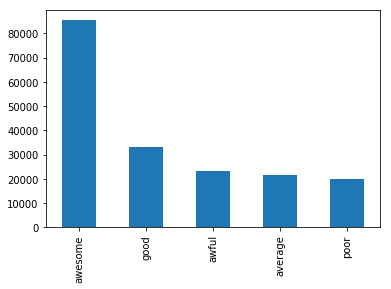

In [148]:
reviews.rating_type.value_counts().plot(kind='bar')

In [151]:
reviews.attendence.value_counts()

 N/A              159534
 Mandatory         16322
 Not Mandatory      7330
Name: attendence, dtype: int64

In [152]:
reviews.grades_revieved.value_counts()

 N/A               164296
 A                   6398
 A+                  2372
 B                   2153
 B+                  1962
 A-                  1763
 Not sure yet        1028
 C                    741
 B-                   589
 C+                   532
 WD                   373
 F                    218
 C-                   207
 D                    203
 INC                  110
 D+                   101
 P                     74
 D-                    44
 Audit/No Grade        22
Name: grades_revieved, dtype: int64

In [154]:
reviews.grades_revieved.value_counts()/reviews.grades_revieved.count()

 N/A               0.896881
 A                 0.034926
 A+                0.012949
 B                 0.011753
 B+                0.010710
 A-                0.009624
 Not sure yet      0.005612
 C                 0.004045
 B-                0.003215
 C+                0.002904
 WD                0.002036
 F                 0.001190
 C-                0.001130
 D                 0.001108
 INC               0.000600
 D+                0.000551
 P                 0.000404
 D-                0.000240
 Audit/No Grade    0.000120
Name: grades_revieved, dtype: float64

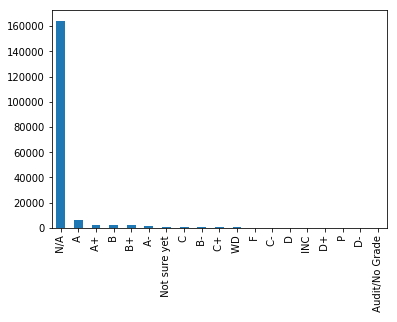

In [153]:
reviews.grades_revieved.value_counts().plot(kind='bar')

In [159]:
reviews.thumbs_up.value_counts().head(5)

0    161502
1     13072
2      4227
3      1793
4       921
Name: thumbs_up, dtype: int64

In [160]:
reviews.thumbs_down.value_counts().head(5)

0    168428
1      9717
2      2540
3       996
4       470
Name: thumbs_down, dtype: int64

In [161]:
reviews.would_take_again.value_counts()

 N/A    169725
 Yes      9710
 No       3751
Name: would_take_again, dtype: int64

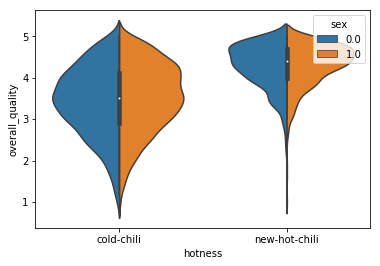

In [167]:
sns.violinplot(x='hotness', y='overall_quality', hue='sex', data=prof, split=True)

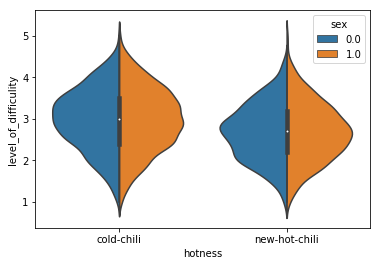

In [166]:
sns.violinplot(x='hotness', y='level_of_difficulity', hue='sex', data=prof, split=True)

In [168]:
pair = prof[['review_count','dept','overall_quality','level_of_difficulity','hotness','take_again', 'hotness', 'sex']]

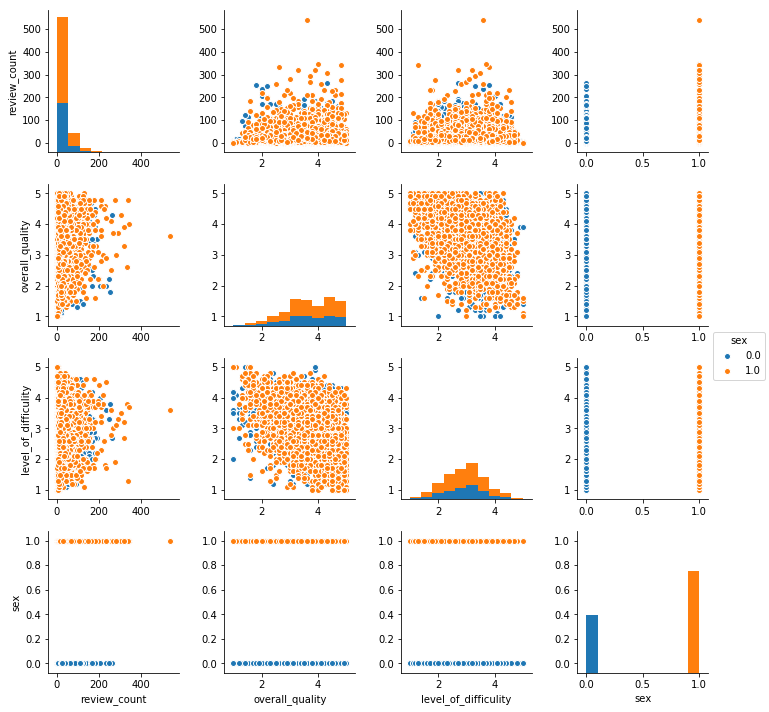

In [170]:
sns.pairplot(pair, hue='sex')

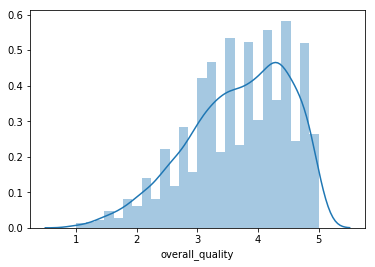

In [172]:
sns.distplot(prof[prof.sex==1].overall_quality)

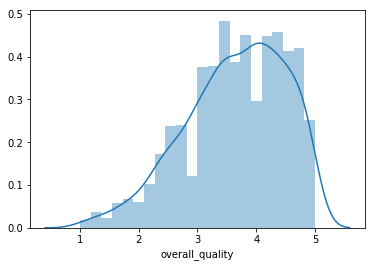

In [173]:
sns.distplot(prof[prof.sex==0].overall_quality)

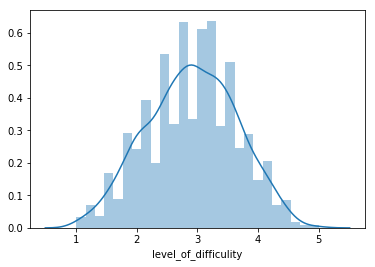

In [174]:
sns.distplot(prof[prof.sex==0].level_of_difficulity)

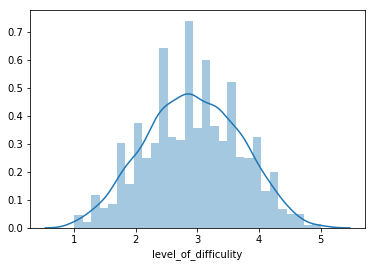

In [175]:
sns.distplot(prof[prof.sex==1].level_of_difficulity)